# SIMULACIÓN | LABORATORIO 4


## Generación de número pseudo-aleatorios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display
import ipywidgets as widgets
import random
from scipy import stats

### El módulo Random de python 


**Ejercicio 1:**
- Defina lo que es una semilla y para qué sirve
- use random.random() para generar números aleatorios. 
- use una semilla con random.seed(semilla), y vuelva a ejecutar random.random()
- ¿qué ocurre si vuelve a definir la misma semilla y ejecutar random.random()?



### Respuesta

#### 1.1)

Una semilla es un número o vector que se utiliza para inicializar un generador de números pseudoaleatorios. Si se usa la misma semilla, siempre se generará la misma secuencia de números.

#### 1.2)

In [27]:
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.10418103546860213
b =  0.8193459126072946
c =  0.331022972864648


#### 1.3)

In [28]:
semilla = 150
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


#### 1.4)

In [29]:
semilla = 150
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


In [30]:
random.seed(semilla)
a = random.random()
print("a = ",a)
b = random.random()
print("b = ",b)
c = random.random()
print("c = ",c)

a =  0.823807241964088
b =  0.895209158949168
c =  0.18786841055338477


Se observa que al redefinir la semilla, se repite la secuencia de números generados. Esto se debe a que se reinicializa el generador, por lo que la secuencia de números se vuelve a generar desde el principio.

**Ejercicio 2:**
Pruebe las funciones y defina sus diferencias:

    - random.randint(a, b)
    - random.randrange(a, b)
    - random.uniform(a, b)
    

### Respuesta

In [31]:
a = 10
b = 15

In [32]:
random.randint(a,b)

12

La función random.randint(a,b) retorna un número entero aleatorio N en el rango (a,b), tal que a <= N <= b.

In [33]:
random.randrange(a,b)

13

La función random.randrange(a,b) retorna un número entero aleatorio N en el rango (a,b), pero a diferencia de randint(), no se incluye el límite superior b, es decir, a <= N < b, por lo que una forma equivalente a randint sería randrange(a,b+1).

In [34]:
random.uniform(a,b)

10.726573361564585

La función random.uniform(a,b) retorna un número de punto flotante aleatorio N en el rango (a,b). El valor b puede o no estar incluido en el rango dependiendo del redondeo de punto flotante de la expresión a + (b-a)*random().

### Clase NotSoRandom:

In [35]:
class NotSoRandom(object):
    def seed(self, a=3):
        """Seed the world's most mysterious random number generator."""
        self.seedval = a
    def random(self):
        """Look, random numbers!"""
        self.seedval = (self.seedval * 3) % 19
        return self.seedval

_inst = NotSoRandom()
seed = _inst.seed
random = _inst.random


**Ejercicio 3:**
- use la semilla 1234 y genere números aleatorios hasta que se cumpla un ciclo completo. ¿Cuál resultó ser el periodo?
- Intente con otra semilla y busque completar un ciclo. 

### Respuesta

#### 3.1)

Cálculo del período con semilla = 1234.

In [36]:
seed(1234)
periodo = 0
cicloCompleto = False
a = random()
j = 0
while(not cicloCompleto):
    b = random()
    j+=1
    if(a == b):
        cicloCompleto = True
print("Periodo: ",j)        

Periodo:  18


#### 3.2)

Cálculo del período con semilla = 150.

In [37]:
seed(150)
periodo = 0
cicloCompleto = False
a = random()
j = 0
while(not cicloCompleto):
    b = random()
    j+=1
    if(a == b):
        cicloCompleto = True
print("Periodo: ",j)   

Periodo:  18


Se observa en ambos casos el período es 18, esto tiene relación con el valor de M, que en el caso del generador NotSoRandom es 19, lo que significa que su período es M - 1 = 18 para cualquier semilla.

#### **Ejercicio 4:**
En este ejercicio vamos a comparar el generador de la biblioteca Random de Python con el generador de números pseudo-aleatorios congruencial lineal descrito en la sesión téórica. Para ello se pide lo siguiente:
1. Programe el generador de números pseudo-aleatorios congruencial lineal 
2. Extraiga secuencias del generador programado y del predefinido en Python, grafique en histogramas, compare y concluya.


### Respuesta

#### 4.1)

Programación del generador congruencial lineal.

In [38]:
class GenCongruencialLineal():
    def __init__(self, semilla=10):
        self.u = semilla
    def random(self):
        A = 16807
        C = 0
        M = 2147483647
        self.u = (A*self.u + C)%M
        return self.u/M

#### 4.2)

In [43]:
# Se inicializan ambos generadores con la misma semilla
genCongruLin = GenCongruencialLineal(15)
random.seed(15)
seq1 = []
seq2 = []
for i in range(1000000):
    seq1.append(genCongruLin.random())
    seq2.append(random.random())

Text(0.5, 1.0, 'Secuencia generador predefinido de Python')

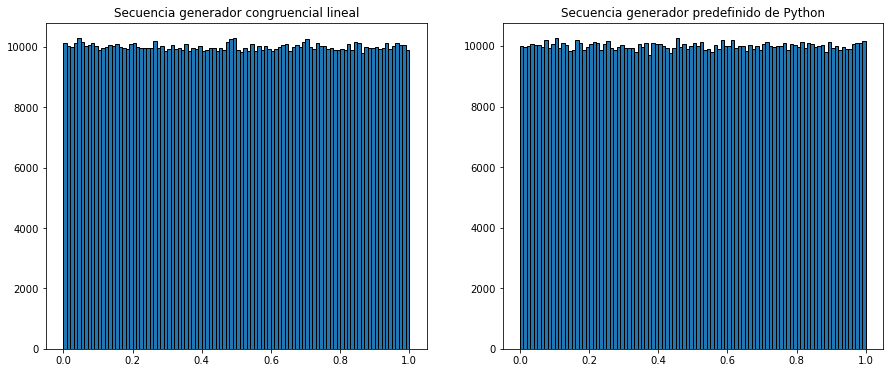

In [42]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
axs[0].hist(seq1, edgecolor = 'black', bins = 100)
axs[0].set_title("Secuencia generador congruencial lineal")
axs[1].hist(seq2, edgecolor = 'black', bins = 100)
axs[1].set_title("Secuencia generador predefinido de Python")

Luego de generar secuencias de 1000000 de números para cada generador y partiendo desde la misma semilla, se observa en sus histogramas que ambos siguen una distribución uniforme, es decir, que cada número tiene igual probababilidad de salir. Por lo que se puede inferir que el generador predefinido de Python tiene un comportamiento muy similar al generador congruencial lineal programado.

#### **Ejercicio 5:**
Escoja una distribución de probabilidad continua.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2) utilizando el test de k-s

### Respuesta Ejercicio 5

In [57]:
# Se generan variables aleatorias con distribución exponencial dada la media
# y el número de variables aleatorias

def inverse_trans(n=1, mean=1):
    """Transformación inversa de la distribución exponencial"""
    
    uniform_dist_vals = stats.uniform.rvs(size=n)
    X = -mean * np.log(1 - uniform_dist_vals) 
    return X

def comparison_between_dists(n=1, mean=1):
    uniform_dist = inverse_trans(n, mean)
    exp_dist_vals = stats.expon.rvs(size=n,scale=mean)
    
    display(stats.kstest(exp_dist_vals, uniform_dist))
    plt.figure(figsize=(12,9))
    plt.hist(uniform_dist, bins=100, alpha=0.5, label="Generada por T.I")
    plt.hist(exp_dist_vals, bins=100, alpha=0.5, label="Valores dist. exponencial")
    plt.title("Generados por T.I vs dist. exp con %i Variables exponenciales aleatorias " %n)
    plt.legend()
    plt.show()



#### Muestra de 100 elementos

KstestResult(statistic=0.08, pvalue=0.9084105017744525)

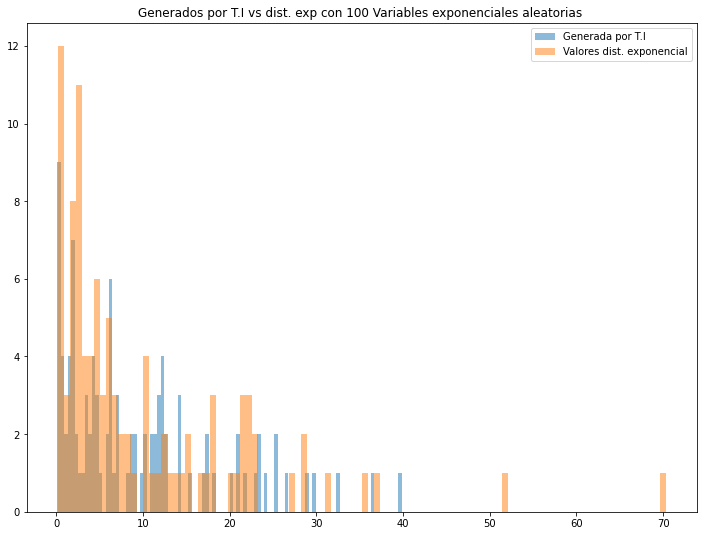

In [58]:
comparison_between_dists(n=100,mean=10)

#### Muestra de 500 elementos

KstestResult(statistic=0.052, pvalue=0.5089169658042532)

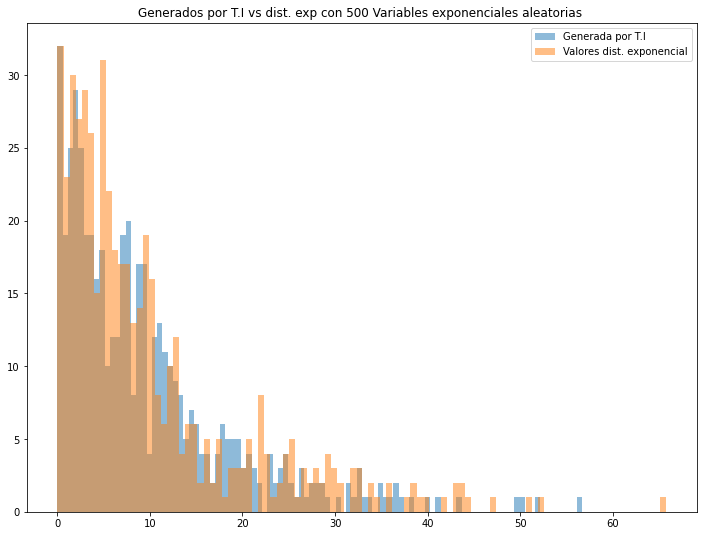

In [59]:
comparison_between_dists(n=500,mean=10)

#### Muestra de 1000 elementos

KstestResult(statistic=0.035, pvalue=0.5728904395829821)

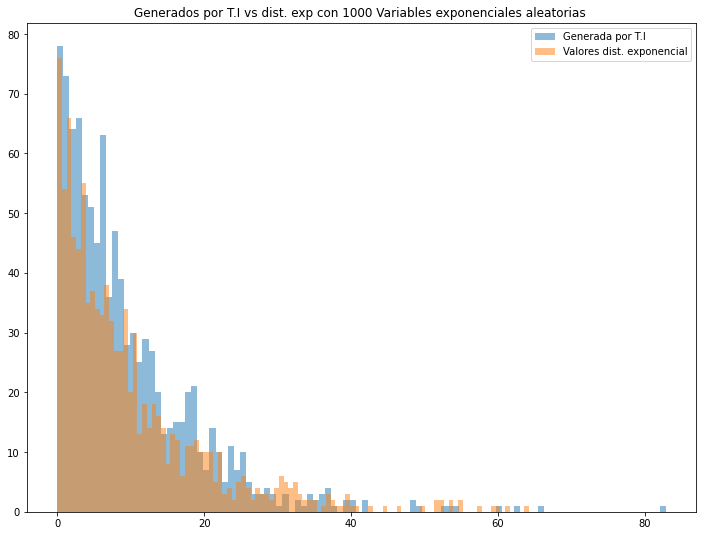

In [60]:
comparison_between_dists(n=1000,mean=10)

#### Muestra de 10000 elementos

KstestResult(statistic=0.0119, pvalue=0.4784083389368079)

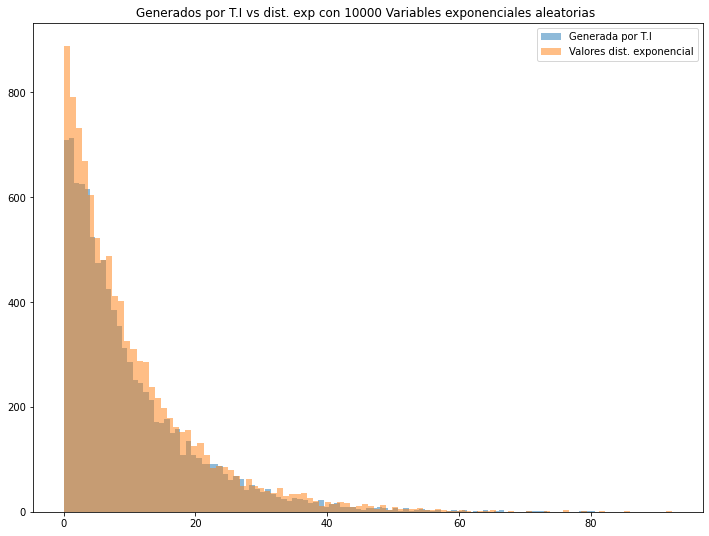

In [61]:
comparison_between_dists(n=10000,mean=10)

#### Muestra de 100000 elementos

KstestResult(statistic=0.0037699999999999956, pvalue=0.4748754264756342)

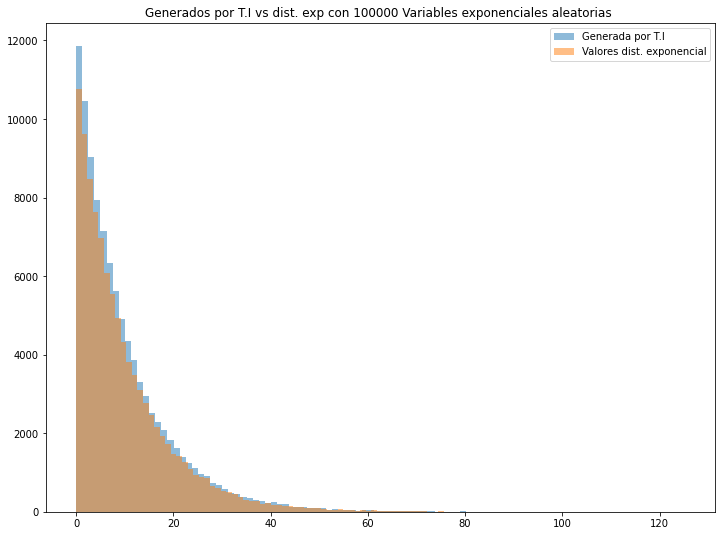

In [62]:
comparison_between_dists(n=100000,mean=10)

Mediante una serie de pruebas obtenidas de la comparación de valores uniformes mapeados por la **transformación inversa** de la distribución exponencial frente a valores aleatorios de la distribución antes mencionada, generados por una función predefinida de Python (de la librería scipy.stats), podemos observar que a medida que el tamaño de la muestra es mayor, los valores mapeados por la transformación inversa se ajustan de mejor forma a la distribución exponencial, coincidiendo con los resultados teóricos analizados en clase.

#### **Ejercicio 6:**
Escoja una distribución de probabilidad discreta.
1. Utilice un método predefinido en Python para generar una secuencia de valores pseudo-aleatorios provenientes de dicha distribución
2. Genere una secuencia considerando el algoritmo de la transformada inversa.
3. Grafique en histogramas y compare las secuencias en (1) y (2). ¿Qué test sería adecuado utilizar en este caso?

### Respuesta

In [63]:
## Probabilidad empírica: Generada por variables discretas aleatorias mediante 
## Transformación inversa
## Probabilidad actual: Probabilidad real de las muestras.

def discrete_inverse_trans(prob_vec):
    U = stats.uniform.rvs(size=1)
    if U <= prob_vec[0]:
        return 1
    else:
        for i in range(1,len(prob_vec)+1):
            if sum(prob_vec[0:i]) < U and sum(prob_vec[0:i+1]) > U:
                return i+1
            
def discrete_samples(prob_vec,n=1):
    sample = [discrete_inverse_trans(prob_vec) for _ in range(n)]
    return np.array(sample)


def discrete_simulate(prob_vec, numbers,n=1):
    sample_disc = discrete_samples(prob_vec,n)
    unique, counts = np.unique(sample_disc, return_counts=True)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    prob = counts / n
    ax.bar(numbers, prob)
    ax.set_title("Simulación de {} variables aleatorias discretas generadas".format(n))
    plt.show()
    
    data={'X':unique,'Numero de muestras':counts,'Probabilidad empirica':prob,'Probabilidad actual':prob_vec}
    df = pd.DataFrame(data)
    return df

In [64]:
prob_vec = np.array([0.1,0.3,0.5,0.05,0.05])
numbers = np.array([1,2,3,4,5])

#### 100 Muestras aleatorias discretas

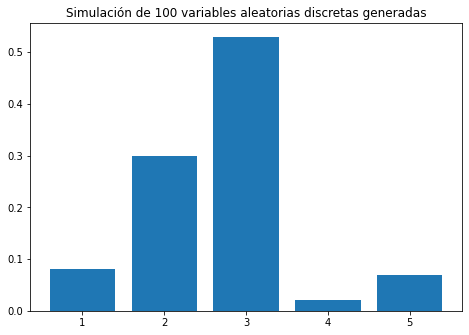

,X,Numero de muestras,Probabilidad empirica,Probabilidad actual
0,1,8,0.08,0.10
1,2,30,0.30,0.30
2,3,53,0.53,0.50
3,4,2,0.02,0.05
4,5,7,0.07,0.05


In [67]:
dis_example1 = discrete_simulate(prob_vec, numbers, n=100)
display(dis_example1)

#### 500 Muestras aleatorias discretas

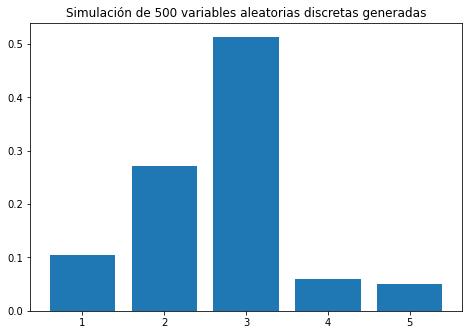

,X,Numero de muestras,Probabilidad empirica,Probabilidad actual
0,1,52,0.104,0.10
1,2,136,0.272,0.30
2,3,257,0.514,0.50
3,4,30,0.060,0.05
4,5,25,0.050,0.05


In [68]:
dis_example2 = discrete_simulate(prob_vec, numbers, n=500)
display(dis_example2)

#### 1000 Muestras aleatorias discretas

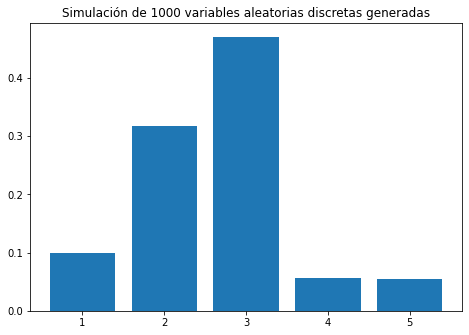

,X,Numero de muestras,Probabilidad empirica,Probabilidad actual
0,1,99,0.099,0.10
1,2,318,0.318,0.30
2,3,471,0.471,0.50
3,4,57,0.057,0.05
4,5,55,0.055,0.05


In [69]:
dis_example3 = discrete_simulate(prob_vec, numbers, n=1000)
display(dis_example3)


#### 5000 Muestras aleatorias discretas

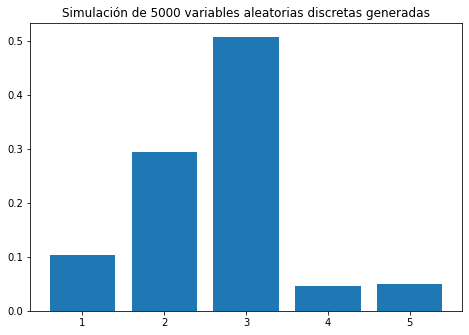

,X,Numero de muestras,Probabilidad empirica,Probabilidad actual
0,1,515,0.1030,0.10
1,2,1472,0.2944,0.30
2,3,2538,0.5076,0.50
3,4,226,0.0452,0.05
4,5,249,0.0498,0.05


In [70]:
dis_example4 = discrete_simulate(prob_vec, numbers, n=5000)
display(dis_example4)


#### 100000 Muestras aleatorias discretas

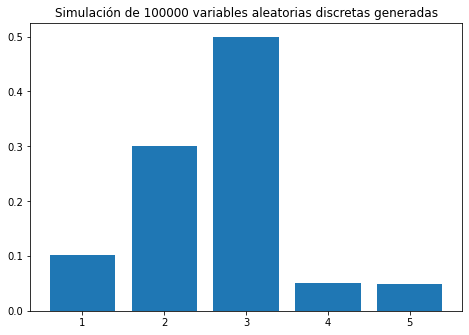

,X,Numero de muestras,Probabilidad empirica,Probabilidad actual
0,1,10090,0.10090,0.10
1,2,30053,0.30053,0.30
2,3,50009,0.50009,0.50
3,4,4996,0.04996,0.05
4,5,4852,0.04852,0.05


In [71]:
dis_example5 = discrete_simulate(prob_vec, numbers, n=100000)
display(dis_example5)

### Análisis 

Podemos observar que a medida que la cantidad de muestras aumenta para la generación de variables aleatorias discretas mapeadas a través de una transformación inversa, la probabilidad empírica se asemeja a la probabilidad real según la cantidad de muestras simuladas. 

**Referencias:**
    
- Generating Random Data in Python (Guide): https://realpython.com/python-random/

- Generación de números pseudo-aleatorios: https://www.youtube.com/watch?v=C82JyCmtKWg